In [15]:
import sklearn
import pandas as pd
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score


In [63]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
from numpy import array
from matplotlib import cm

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [64]:
train = pd.read_csv('train.csv')
train.head()
test = pd.read_csv('test.csv')

In [65]:
df_train= pd.read_csv('train.csv')

In [66]:
train['birth_date']
train_len = len(train)

In [67]:
train['brith_date_format'] = pd.to_datetime(train['birth_date'], format='%m/%d/%y')
test['brith_date_format'] = pd.to_datetime(test['birth_date'], format='%m/%d/%y')
date_data = pd.concat([train['brith_date_format'],test['brith_date_format']])

In [68]:
import datetime as DT
import numpy as np
now = pd.Timestamp(DT.datetime.now())
age = date_data.where(date_data < now, date_data -  np.timedelta64(100, 'Y'))   # 2
age = (now - date_data).astype('<m8[Y]')    # 3
age = pd.Series(age)
age.head()
train['age']= age[:train_len]
test['age']= age[train_len:]
train = train.drop(columns=['birth_date','brith_date_format'])
test = test.drop(columns=['birth_date','brith_date_format'])

In [69]:
train['is_keeper'] = train['gk'].notnull()
test['is_keeper'] = test['gk'].notnull()

In [70]:
train = train.fillna(0);
test = test.fillna(0);

In [71]:
train.isnull().sum().nlargest(10)
print(train.shape)

(10441, 66)


In [72]:
train_Y = train['y']
tid = test['id']
test = test.drop(columns=['id'])
test = pd.get_dummies(test)
train = train.drop(columns=['id','y'])
train = pd.get_dummies(train)

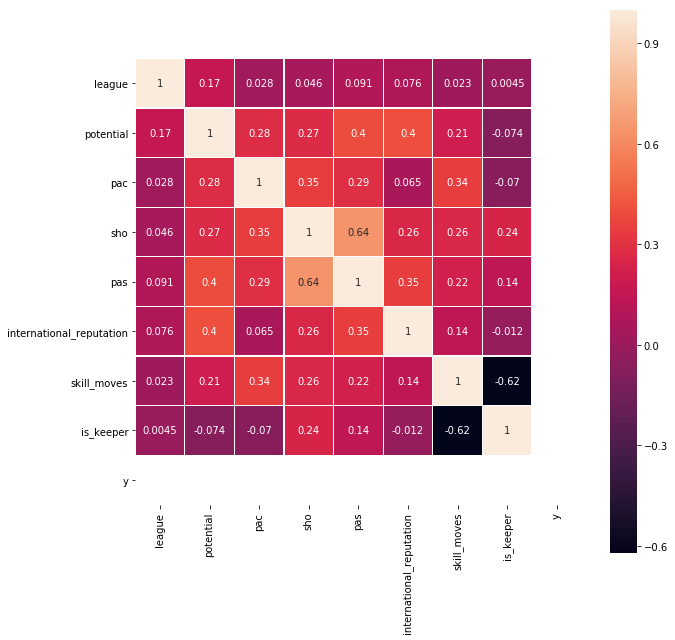

In [73]:
corrmat = train.corr()
from matplotlib import pyplot
import seaborn as sns
df_interesting = train.loc[:,['league','potential','pac','sho','pas','international_reputation','skill_moves','is_keeper','y']]

plt.figure(figsize=(10,10))
sns.heatmap(df_interesting.corr(),linewidths=0.1,vmax=1.0,square=True, linecolor='white', annot=True)
plt.show()

In [ ]:
# train = train.fillna(train.mean())
# test = test.fillna(test.mean())
# train.isnull().sum().nlargest(10)

In [15]:

train_x,cv_x,train_y,cv_y = train_test_split(train,train_Y)

ValueError: labels ['id' 'y'] not contained in axis

In [ ]:
train = pd.get_dummies(train)
rf = RandomForestRegressor()

In [ ]:
train.head()

In [ ]:

cv = cross_val_score(rf, train, train_Y, scoring='neg_mean_absolute_error') 

In [ ]:
print(cv.mean())

In [ ]:
rf.fit(train,train_Y)

In [ ]:

test_predict_y = rf.predict(test)

In [ ]:
sumbit = pd.DataFrame({'id':tid,'y':test_predict_y})
sumbit.to_csv('submit.rf.csv',index=False)

In [ ]:
fi = pd.DataFrame({'name':train.columns,'imp':rf.feature_importances_})
fi.plot.bar(x='name',y='imp')

In [ ]:
fi.nlargest(columns=['imp'],n=30).plot.bar(x='name',y='imp')

In [ ]:
df_train.plot.scatter(x='potential',y='y')

In [ ]:
df_train.plot.scatter(x='international_reputation',y='y')

In [ ]:
df_train.plot.scatter(x='cf',y='y')

In [ ]:
df_train['potential'] =  np.log(df_train['potential'])
df_train.plot.hist(x='potential',y='y')


In [ ]:
from sklearn.svm import SVR
svr_model = SVR(C=100)
cv_svr = cross_val_score(svr_model, train, train_Y, scoring='neg_mean_absolute_error') 
print('model svr:',-cv_svr.mean())

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = { 'C':[0.1,1, 10,100]}
# clf = GridSearchCV(svr_model, parameters)
# clf.fit(train,train_Y)
# clf.best_params_  # 100

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
cv_gbr = cross_val_score(gbr, train, train_Y, scoring='neg_mean_absolute_error') 
print('model gbr:',-cv_gbr.mean())

In [ ]:
gbr.fit(train,train_Y)
test_predict_gbr = gbr.predict(test)
sumbit = pd.DataFrame({'id':tid,'y':test_predict_gbr})
sumbit.to_csv('submit.gbr.csv',index=False)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
cv_lasso = cross_val_score(lasso, train, train_Y, scoring='neg_mean_absolute_error') 
print('model lasso:',-cv_lasso.mean())

In [ ]:
lasso.fit(train,train_Y)
test_predict_lasso = gbr.predict(test)
sumbit = pd.DataFrame({'id':tid,'y':test_predict_lasso})
sumbit.to_csv('submit.lasso.csv',index=False)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
cv_ridge = cross_val_score(ridge, train, train_Y, scoring='neg_mean_absolute_error') 
print('model ridge:',-cv_ridge.mean())

In [ ]:
from sklearn.tree import ExtraTreeRegressor
et = ExtraTreeRegressor(min_samples_split=4)
cv_et = cross_val_score(et, train, train_Y, scoring='neg_mean_absolute_error') 
print('model et:',-cv_et.mean())

In [ ]:
et.fit(train,train_Y)
test_predict_et = gbr.predict(test)
sumbit = pd.DataFrame({'id':tid,'y':test_predict_et})
sumbit.to_csv('submit.et.csv',index=False)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(n_estimators=10)
cv_ab = cross_val_score(ab, train, train_Y, scoring='neg_mean_absolute_error') 
print('model ab:',-cv_ab.mean())

In [ ]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(GradientBoostingRegressor(**params))
cv_br = cross_val_score(br, train, train_Y, scoring='neg_mean_absolute_error') 
print('model br:',-cv_br.mean())

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train)
cv_X_train_minmax = cross_val_score(rf, X_train_minmax, train_Y, scoring='neg_mean_absolute_error') 
X_train_minmax.mean()

In [ ]:
rf.fit(X_train_minmax,train_Y)
test_min_max = min_max_scaler.transform(test)
test_predict_rf_maxmin = gbr.predict(test)
sumbit = pd.DataFrame({'id':tid,'y':test_predict_rf_maxmin})
sumbit.to_csv('submit.rf.maxmin.csv',index=False)

In [76]:
from sklearn import  *
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),

    #Gaussian Processes
    gaussian_process.GaussianProcessRegressor(),
    
    #GLM
#     linear_model.LogisticRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.RidgeCV(),
    linear_model.SGDRegressor(),
#     linear_model.Perceptron(),
    
    #Navies Bayes
#     naive_bayes.BernoulliNB(),
#     naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
#     neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVR(),
    svm.NuSVR(),
    svm.LinearSVR(),
    
    #Trees    
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
    
    #Discriminant Analysis
#     discriminant_analysis.LinearDiscriminantAnalysis(),
#     discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = pd.DataFrame()

#index through MLA and save performance to table
row_index = 0
for i, alg in enumerate(MLA):
    print('in processing %d%%'% (1.0*i/len(MLA)))
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg,train, train_Y, cv  = cv_split,scoring='neg_mean_absolute_error')
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!

    #save MLA predictions - see section 6 for usage
    alg.fit(train, train_Y)
    MLA_predict[MLA_name] = alg.predict(test)
    
    row_index+=1


    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

in processing 0%
in processing 0%
in processing 0%
in processing 0%
in processing 0%
in processing 0%
in processing 0%
in processing 0%
in processing 0%
in processing 0%
in processing 0%
in processing 0%
in processing 0%
in processing 0%


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
2,ExtraTreesRegressor,"{'bootstrap': False, 'criterion': 'mse', 'max_...",0,-34.142,4.6282,0.742674
4,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",-14.8873,-34.5375,7.55524,1.47995
1,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",-14.9537,-34.5565,6.31682,1.47205
3,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",-32.0129,-39.3279,3.64284,1.10181
12,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0,-48.2495,4.7247,0.255426
13,ExtraTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0,-58.7126,6.69492,0.09991
7,RidgeCV,"{'alphas': (0.1, 1.0, 10.0), 'cv': None, 'fit_...",-149.41,-149.227,6.2961,0.328433
11,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",-166.815,-164.716,72.7801,2.12171
9,SVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",-193.85,-190.331,12.1441,4.92679
10,NuSVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",-205.07,-201.019,11.2597,3.27343


In [78]:
MLA_predict.head()

,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,GaussianProcessRegressor,PassiveAggressiveRegressor,RidgeCV,SGDRegressor,SVR,NuSVR,LinearSVR,DecisionTreeRegressor,ExtraTreeRegressor
0,313.270062,59.25,51.50,47.850183,59.00,0.0,40.450873,18.882669,-1.219509e+14,72.842855,127.328685,-118.677906,60.0,45.0
1,335.715967,57.40,65.75,56.212865,76.25,0.0,475.023786,236.935466,-1.293908e+14,72.842855,127.328685,141.994820,52.5,60.0
2,313.270062,180.00,167.25,151.809722,182.00,0.0,241.664519,94.697703,-6.874787e+13,72.842855,127.328685,84.033363,180.0,270.0
3,335.715967,147.00,148.00,116.107072,168.75,0.0,355.213268,320.101847,-1.803101e+14,72.842855,127.328685,-2.906079,97.5,120.0
4,313.270062,7.80,8.00,18.688973,7.00,0.0,-290.499517,-109.949376,-8.304892e+13,72.842855,127.328685,-227.915089,6.0,7.0


In [89]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'